In [2]:
import pickle

import numpy
import pandas as pd

import matplotlib
import matplotlib.pyplot  as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

### Read data

In [3]:
# coordinates of the registered spots
# grouped based on the genotype and time point
with open('st_coordinates_per_condition.pkl','rb') as f:
    st_coordinates_per_condition = pickle.load(f)

# genes (row labels)
with open('st_genes.pkl','rb') as f:
    genes = pickle.load(f)

# posterior means (lambda) of the registered spots
# grouped based on the genotype and time point
with open('st_data_per_condition.pkl','rb') as f:
    st_data_per_condition = pickle.load(f)

# get the conditions (genotype and timepoint combinations)
conditions = list(st_data_per_condition.keys())
#print(st_coordinates_per_condition)
#print(genes)
#print(st_data_per_condition['WT_p30'])
#print( gene[0])
print(conditions)


['WT_p30', 'WT_p70', 'WT_p100', 'WT_p120', 'G93A_p30', 'G93A_p70', 'G93A_p100', 'G93A_p120', 'ATG7(fl/fl);ChatCre(+/-);SOD(+/-)_p100', 'ATG7(fl/fl);ChatCre(+/-);SOD(+/-)_p120']


In [4]:
conditions.remove('ATG7(fl/fl);ChatCre(+/-);SOD(+/-)_p100')
conditions.remove('ATG7(fl/fl);ChatCre(+/-);SOD(+/-)_p120')
print(conditions)

['WT_p30', 'WT_p70', 'WT_p100', 'WT_p120', 'G93A_p30', 'G93A_p70', 'G93A_p100', 'G93A_p120']


### Data summary

In [5]:
print('Number of genes: %d'%(len(genes)))
print('Number of conditions: %d'%(len(conditions)))
print('Number of points: %d'%(sum([foo.shape[0] for foo in st_coordinates_per_condition.values()])))
print('Conditions: %s'%(', '.join(conditions)))

for condition in conditions:
    print('Number of points (%s): %d '%(condition,st_coordinates_per_condition[condition].shape[0]))

Number of genes: 11138
Number of conditions: 8
Number of points: 70523
Conditions: WT_p30, WT_p70, WT_p100, WT_p120, G93A_p30, G93A_p70, G93A_p100, G93A_p120
Number of points (WT_p30): 4958 
Number of points (WT_p70): 3845 
Number of points (WT_p100): 5485 
Number of points (WT_p120): 5092 
Number of points (G93A_p30): 7911 
Number of points (G93A_p70): 5402 
Number of points (G93A_p100): 4920 
Number of points (G93A_p120): 8241 


### Plot data

In [71]:
gene = 'Taldo1'

<Figure size 2250x1200 with 0 Axes>

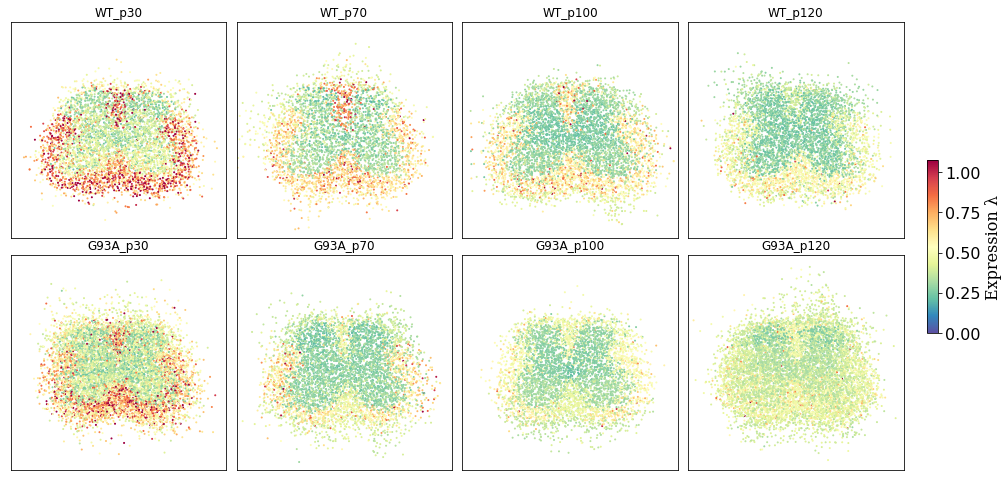

In [72]:
fig = plt.figure(figsize=(15,8),dpi=150)
fig = matplotlib.pyplot.figure()
fig.set_size_inches(len(conditions)*2,(len(conditions)*1))


vmin = 0
vmax = numpy.percentile(numpy.hstack([st_data_per_condition[condition][numpy.where(genes == gene)[0][0],:] for condition in conditions]),99)

for condition_idx,condition in enumerate(conditions,start=1):
    ax = fig.add_subplot(2,4,condition_idx)

    cm = plt.cm.get_cmap('Spectral_r') 
    ax.set_title(condition)
    im = ax.scatter(st_coordinates_per_condition[condition][:,0],
               st_coordinates_per_condition[condition][:,1],
               c=st_data_per_condition[condition][numpy.where(genes == gene)[0][0],:],s=1,vmin=vmin,vmax=vmax,cmap=cm)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_xlim([-8,8])
    ax.set_ylim([-8,8])
    
    ax.set_aspect('equal')

#fig.set_tight_layout(True)

fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                wspace=0.05, hspace=0.02)

#show color bar
#l,b,w,h = 0.35, 0.08, 0.3, 0.01
l,b,w,h = 0.92, 0.35, 0.01, 0.3
rect = [l,b,w,h]
cbar_ax = fig.add_axes(rect)
#cb = fig.colorbar(im, cbar_ax,orientation='horizontal',spacing='proportional')
cb = fig.colorbar(im, cbar_ax,spacing='proportional')
cb.ax.tick_params(labelsize=16)
font = {'family' : 'serif',
       'color'  : 'darkred',
    'color'  : 'black',
    'weight' : 'normal',
    'size'   : 16,
    }
cb.set_label('Expression λ' ,fontdict=font)

#save files
pdf=PdfPages('Taldo1_2*1_v.pdf')
pdf.savefig(plt.gcf(),bbox_inches='tight')

pdf.close()